In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

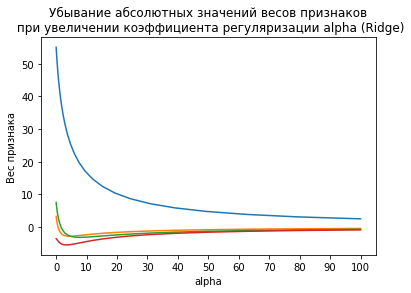

In [6]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X_st[:train_amount]
train_y = y[:train_amount]
test_X = X_st[train_amount:]
test_y = y[train_amount:]

coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 

Метод нормализации заключается в приведении признаков к масштабу в диапазоне [0-1]. После преобразования значений признаков минимальное значение превратится в 0, а максимальное - в 1. Стандартизация заключается в получении своего рода значения сдвига каждого признака от среднего. Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние (knn, k-means). Стандартизировать полезно признаки для модели, которая опирается на распределение (линейные модели). В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации. 

In [12]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sum(abs(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [16]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-3, reg=1e-8)

Iter: 0, weights: [ 1.99164297  0.33775819 -1.18020761  1.79671466], error 3124.2046494948545
Iter: 500, weights: [36.4675652   4.22635727  2.05467236  5.2518481 ], error 430.13789374939176
Iter: 1000, weights: [49.13785457  4.86368531  1.99275267  5.47902738], error 80.51099003465916
Iter: 1500, weights: [53.79432849  5.17821824  1.73260668  5.50220448], error 33.105186814539124
Iter: 2000, weights: [55.50563506  5.40638369  1.4941679   5.5328577 ], error 26.527161465053105
Iter: 2500, weights: [56.13455948  5.58106654  1.28716098  5.57844641], error 25.51703153947369
Iter: 3000, weights: [56.36569628  5.71624726  1.10721273  5.63371265], error 25.2932824760137
Iter: 3500, weights: [56.45064165  5.8216      0.94996847  5.69415718], error 25.198441186879847
Iter: 4000, weights: [56.48186003  5.90431045  0.81188474  5.75657705], error 25.136576177434893
Iter: 4500, weights: [56.49333314  5.9697623   0.69010173  5.81876907], error 25.09023162277324
Final MSE: 25.054108365628657


array([56.49754473,  6.02190555,  0.58249651,  5.87914103])